### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
wd = "F:/Beetle_classification_deep_data/Phloeosinus_dentatus/Vial_18068/Subset_1"
# image_name = "IMG_0269_clean.JPG"
# image_name = "IMG_0046.JPG"
# image_name = "IMG_0014.JPG"
image_name = "IMG_0010.JPG"
wd_image_path =  wd+"/"+ image_name
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path, manual_thresh_buffer=0.15)

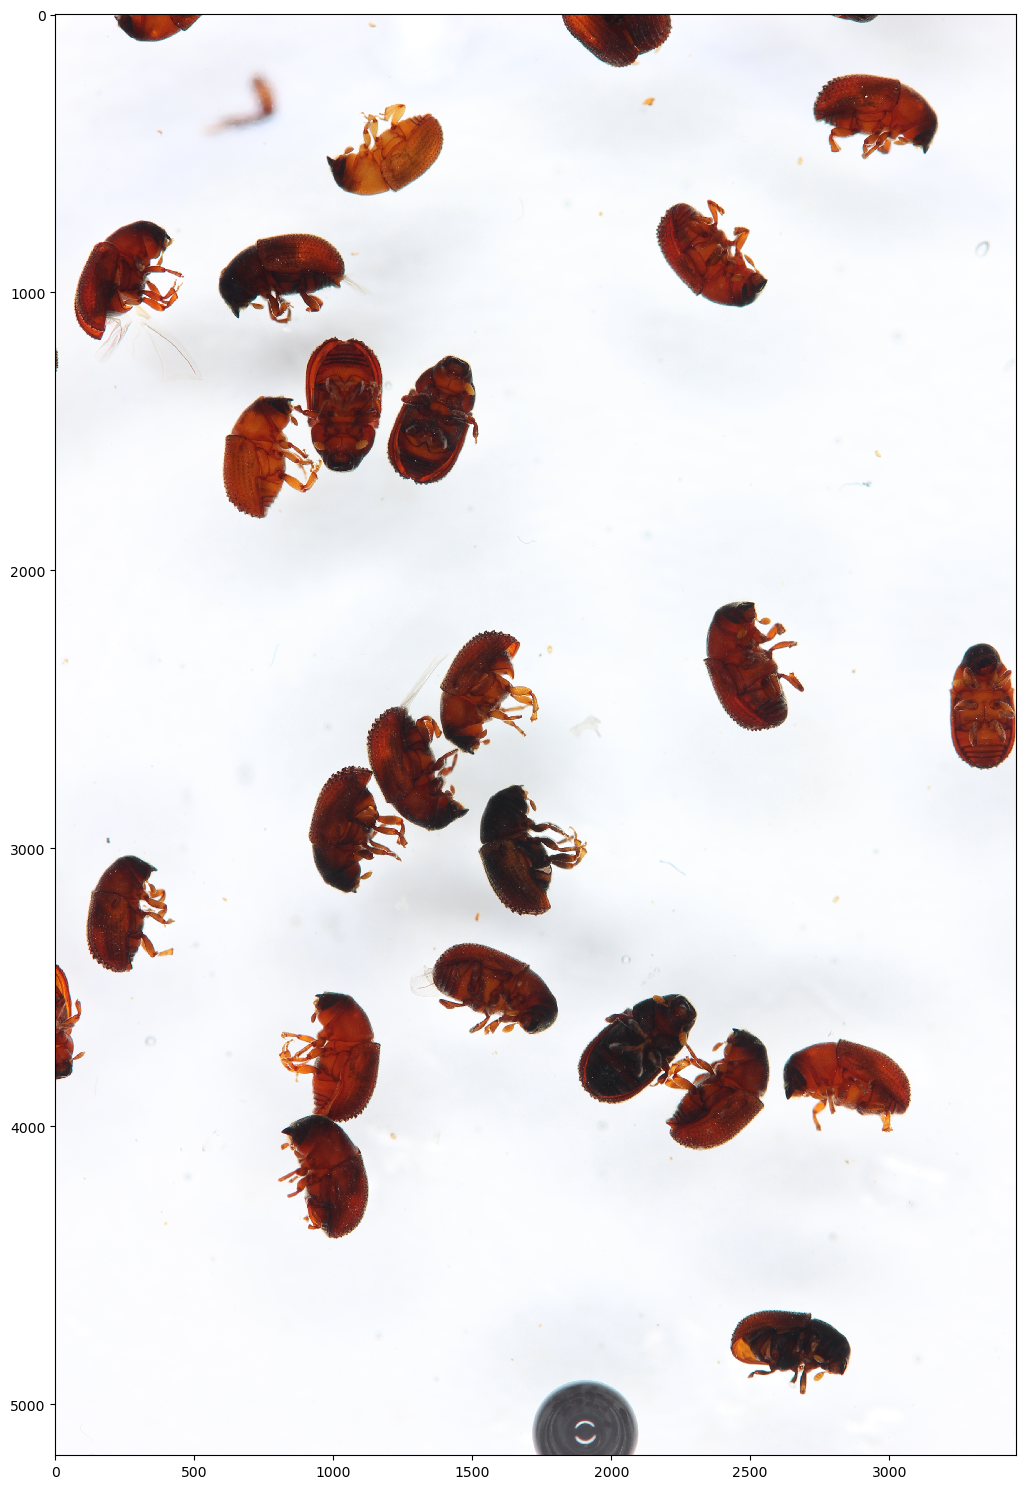

In [4]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.image)
plt.show()

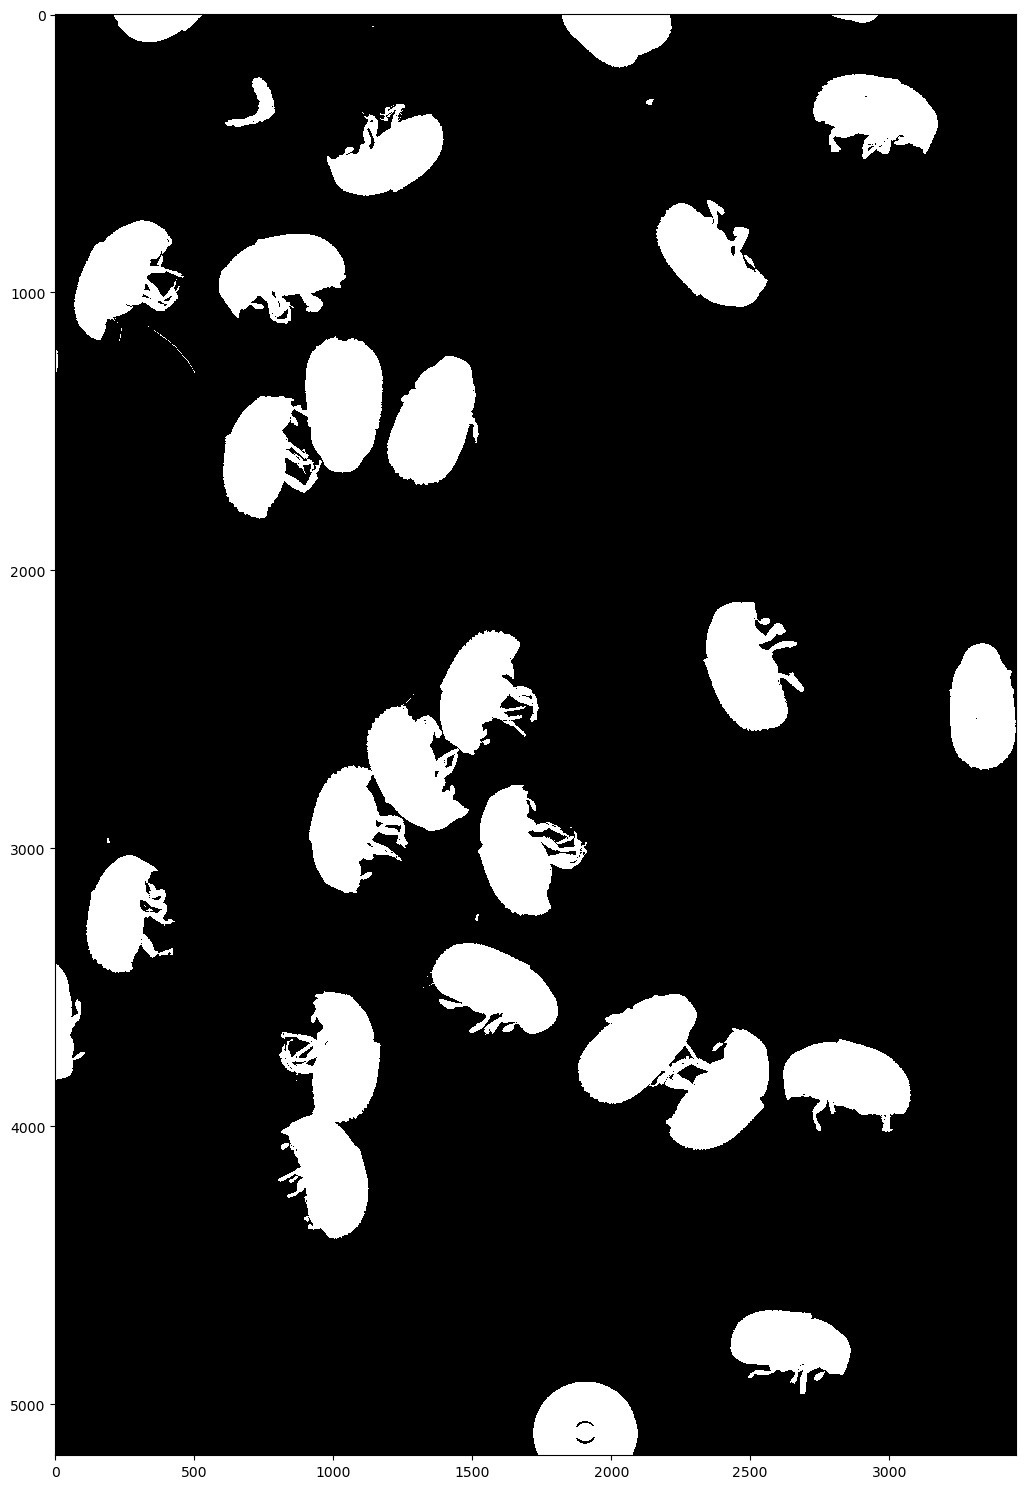

In [5]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.inv_bw_image)
plt.show()

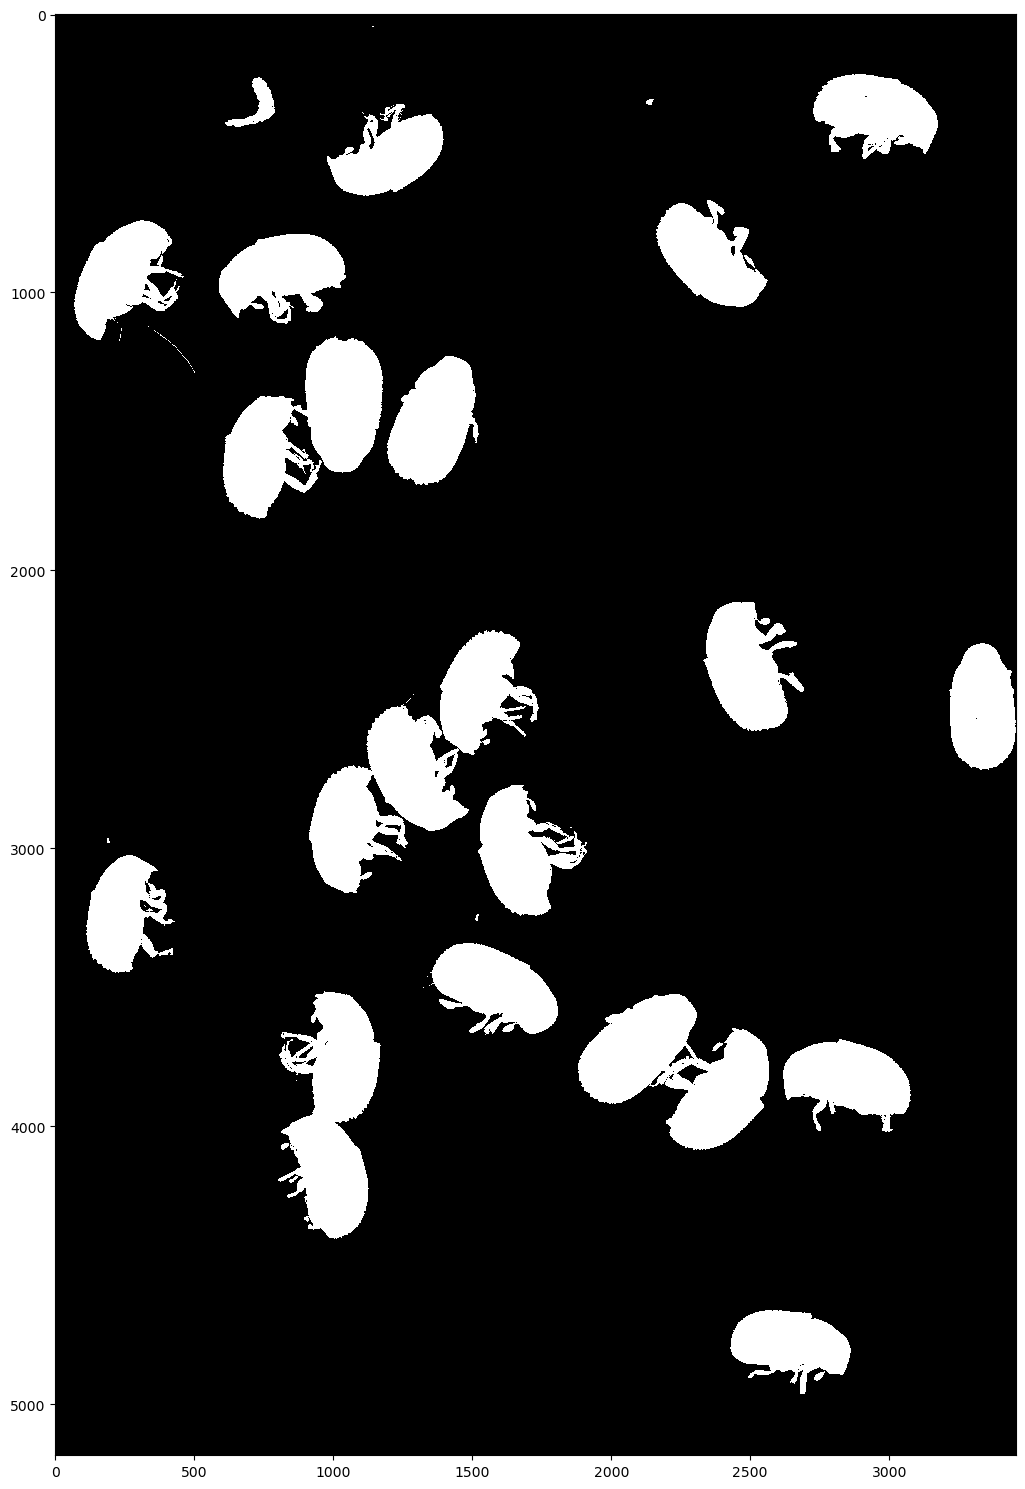

In [6]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

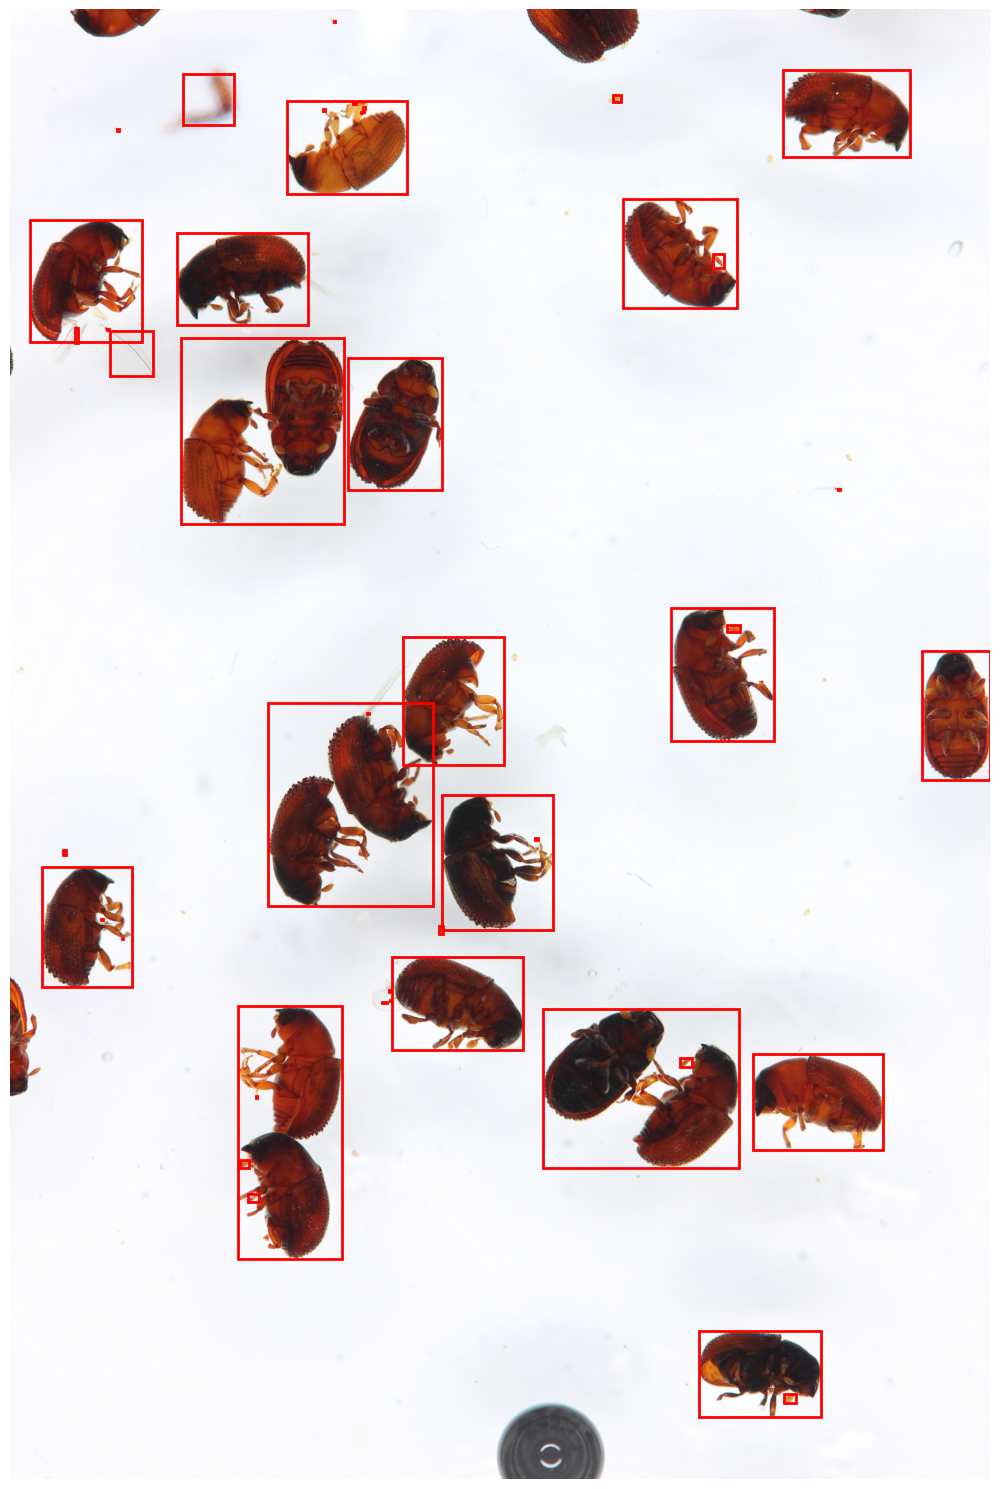

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0     43.833333  1143.166667      43    1141      45    1146    -1.488222   
1    355.147469  2950.945461     216    2726     523    3175     1.358185   
2    328.829429   729.836367     227     611     407     790    -0.561639   
3    315.336933  2139.419006     304    2125     329    2155    -0.896588   
4    507.567979  1202.971178     324     976     653    1398    -1.073329   
..          ...          ...     ...     ...     ...     ...          ...   
58  4030.000000  1211.000000    4030    1211    4031    1212     0.785398   
59  4071.721649   825.692784    4060     812    4086     842    -1.005863   
60  4192.446809   856.521277    4179     840    4205     876    -0.976205   
61  4785.544609  2643.102854    4663    2428    4966    2861     1.419450   
62  4899.629679  2747.434492    4883    2729    4916    2771    -0.912726   

    axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0            5.391920           1.427692      6            6             1  
1          460.453235         269.461244  92209        92573             0  
2          225.170591         126.311115  11098        11112             1  
3           29.799825          21.485880    463          463             1  
4          439.834764         253.588391  80841        81760             0  
..                ...                ...    ...          ...           ...  
58           0.000000           0.000000      1            1             1  
59          34.089668          18.517711    485          485             1  
60          43.013782          12.279387    376          376             1  
61         446.435688         241.143545  80454        80498             0  
62          46.633229          21.043855    748          748             1  

[63 rows x 12 columns]

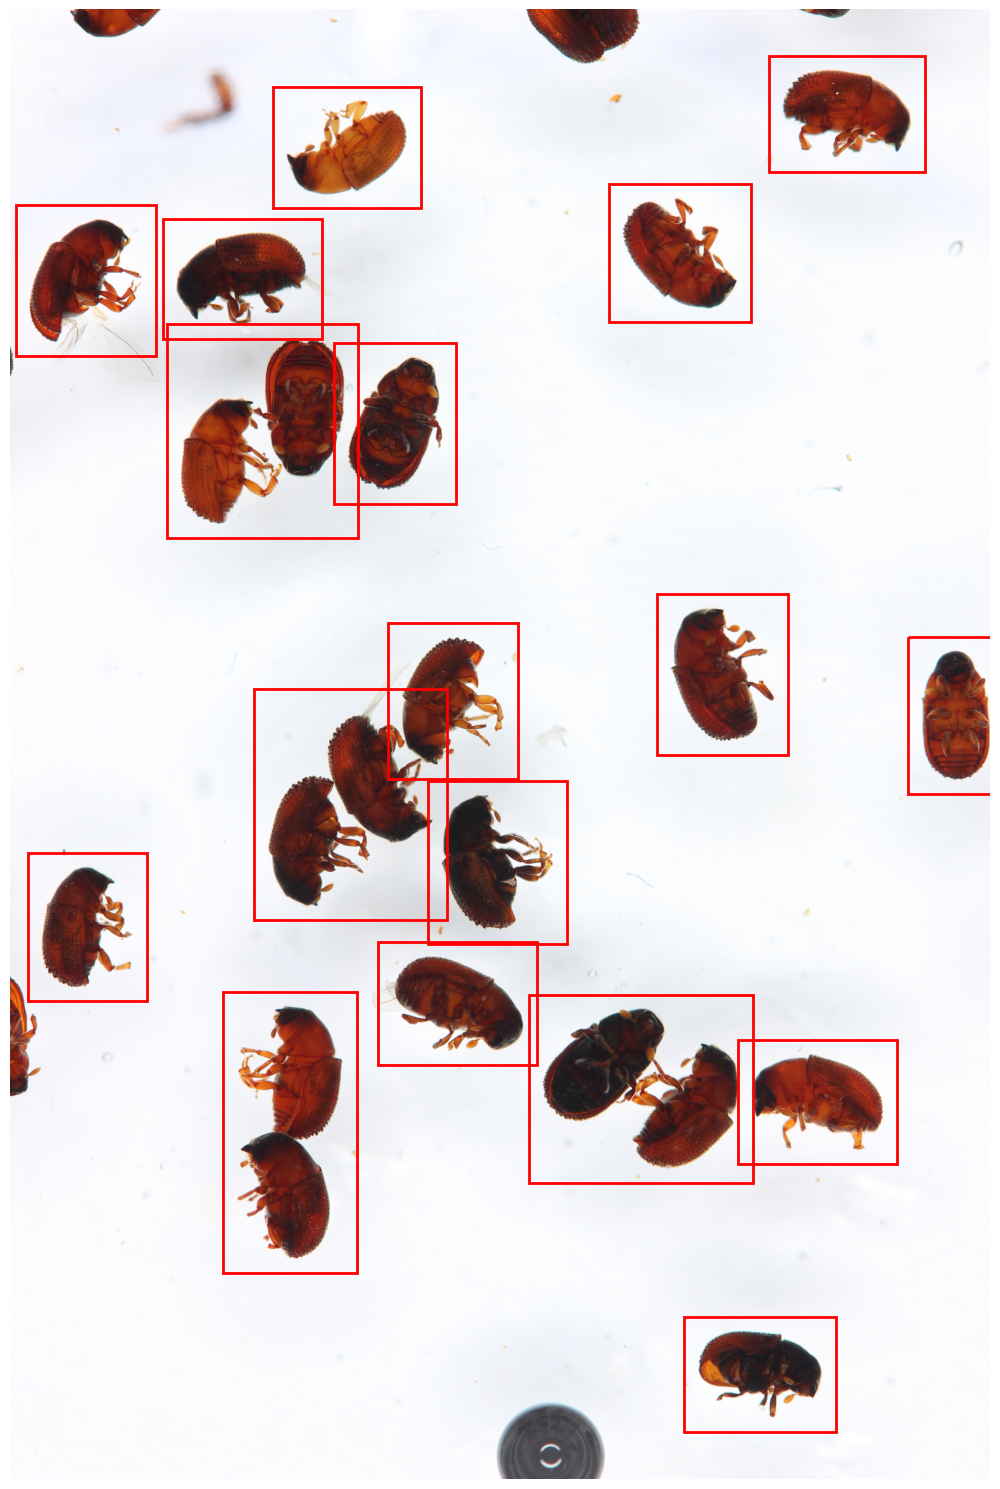

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    355.147469  2950.945461     166    2676     573    3225     1.358185   
1    507.567979  1202.971178     274     926     703    1448    -1.073329   
2    871.463613  2348.796062     618    2111    1105    2613     0.769408   
3    943.859719   240.616097     692      19    1224     514    -0.667959   
4    934.386722   814.311197     740     538    1164    1099    -1.332977   
5   1483.976648   904.592515    1110     554    1866    1228    -0.836493   
6   1469.997155  1361.937953    1179    1143    1745    1574    -0.389203   
7   2353.021105  2487.967571    2063    2281    2631    2744     0.302057   
8   2432.060787  1531.609729    2165    1334    2715    1791    -0.348775   
9   2499.174059  3335.466409    2214    3166    2769    3505     0.026999   
10  2819.591581  1175.778019    2396     861    3213    1540    -0.674959   
11  3016.473084  1675.279617    2722    1472    3296    1964     0.285750   
12  3238.309299   244.901970    2977      63    3499     481    -0.187518   
13  3504.264505  1581.415748    3291    1296    3722    1859     1.126534   
14  3955.689424  1003.090277    3466     752    4457    1222    -0.045018   
15  3799.781965  2238.663936    3475    1829    4138    2619     1.188775   
16  3834.264816  2852.422992    3636    2568    4073    3129     1.353344   
17  4785.544609  2643.102854    4613    2378    5016    2911     1.419450   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0          460.453235         269.461244   92209        92573             0  
1          439.834764         253.588391   80841        81760             0  
2          462.141025         266.288205   90444        90904             0  
3          458.273805         296.584914   93555        94524             0  
4          468.716216         281.370053   96312        97286             0  
5          798.162799         401.065868  200579       206531             0  
6          484.993467         274.297546  102987       103000             0  
7          489.936115         286.226553  101824       101867             0  
8          445.964911         303.957626   92223        92549             0  
9          459.563496         241.136516   86557        86564             0  
10         721.688847         419.334764  193255       195632             0  
11         463.638474         321.149241  100720       105592             0  
12         428.846365         271.307351   81995        84371             0  
13         489.132741         267.255299   97968        97974             0  
14         960.031656         302.889557  193260       195113             0  
15         756.202157         470.976607  212058       217866             0  
16         486.144299         267.991438   96399        96496             0  
17         446.435688         241.143545   80454        80498             0

All images printed (18)
All images printed (18)


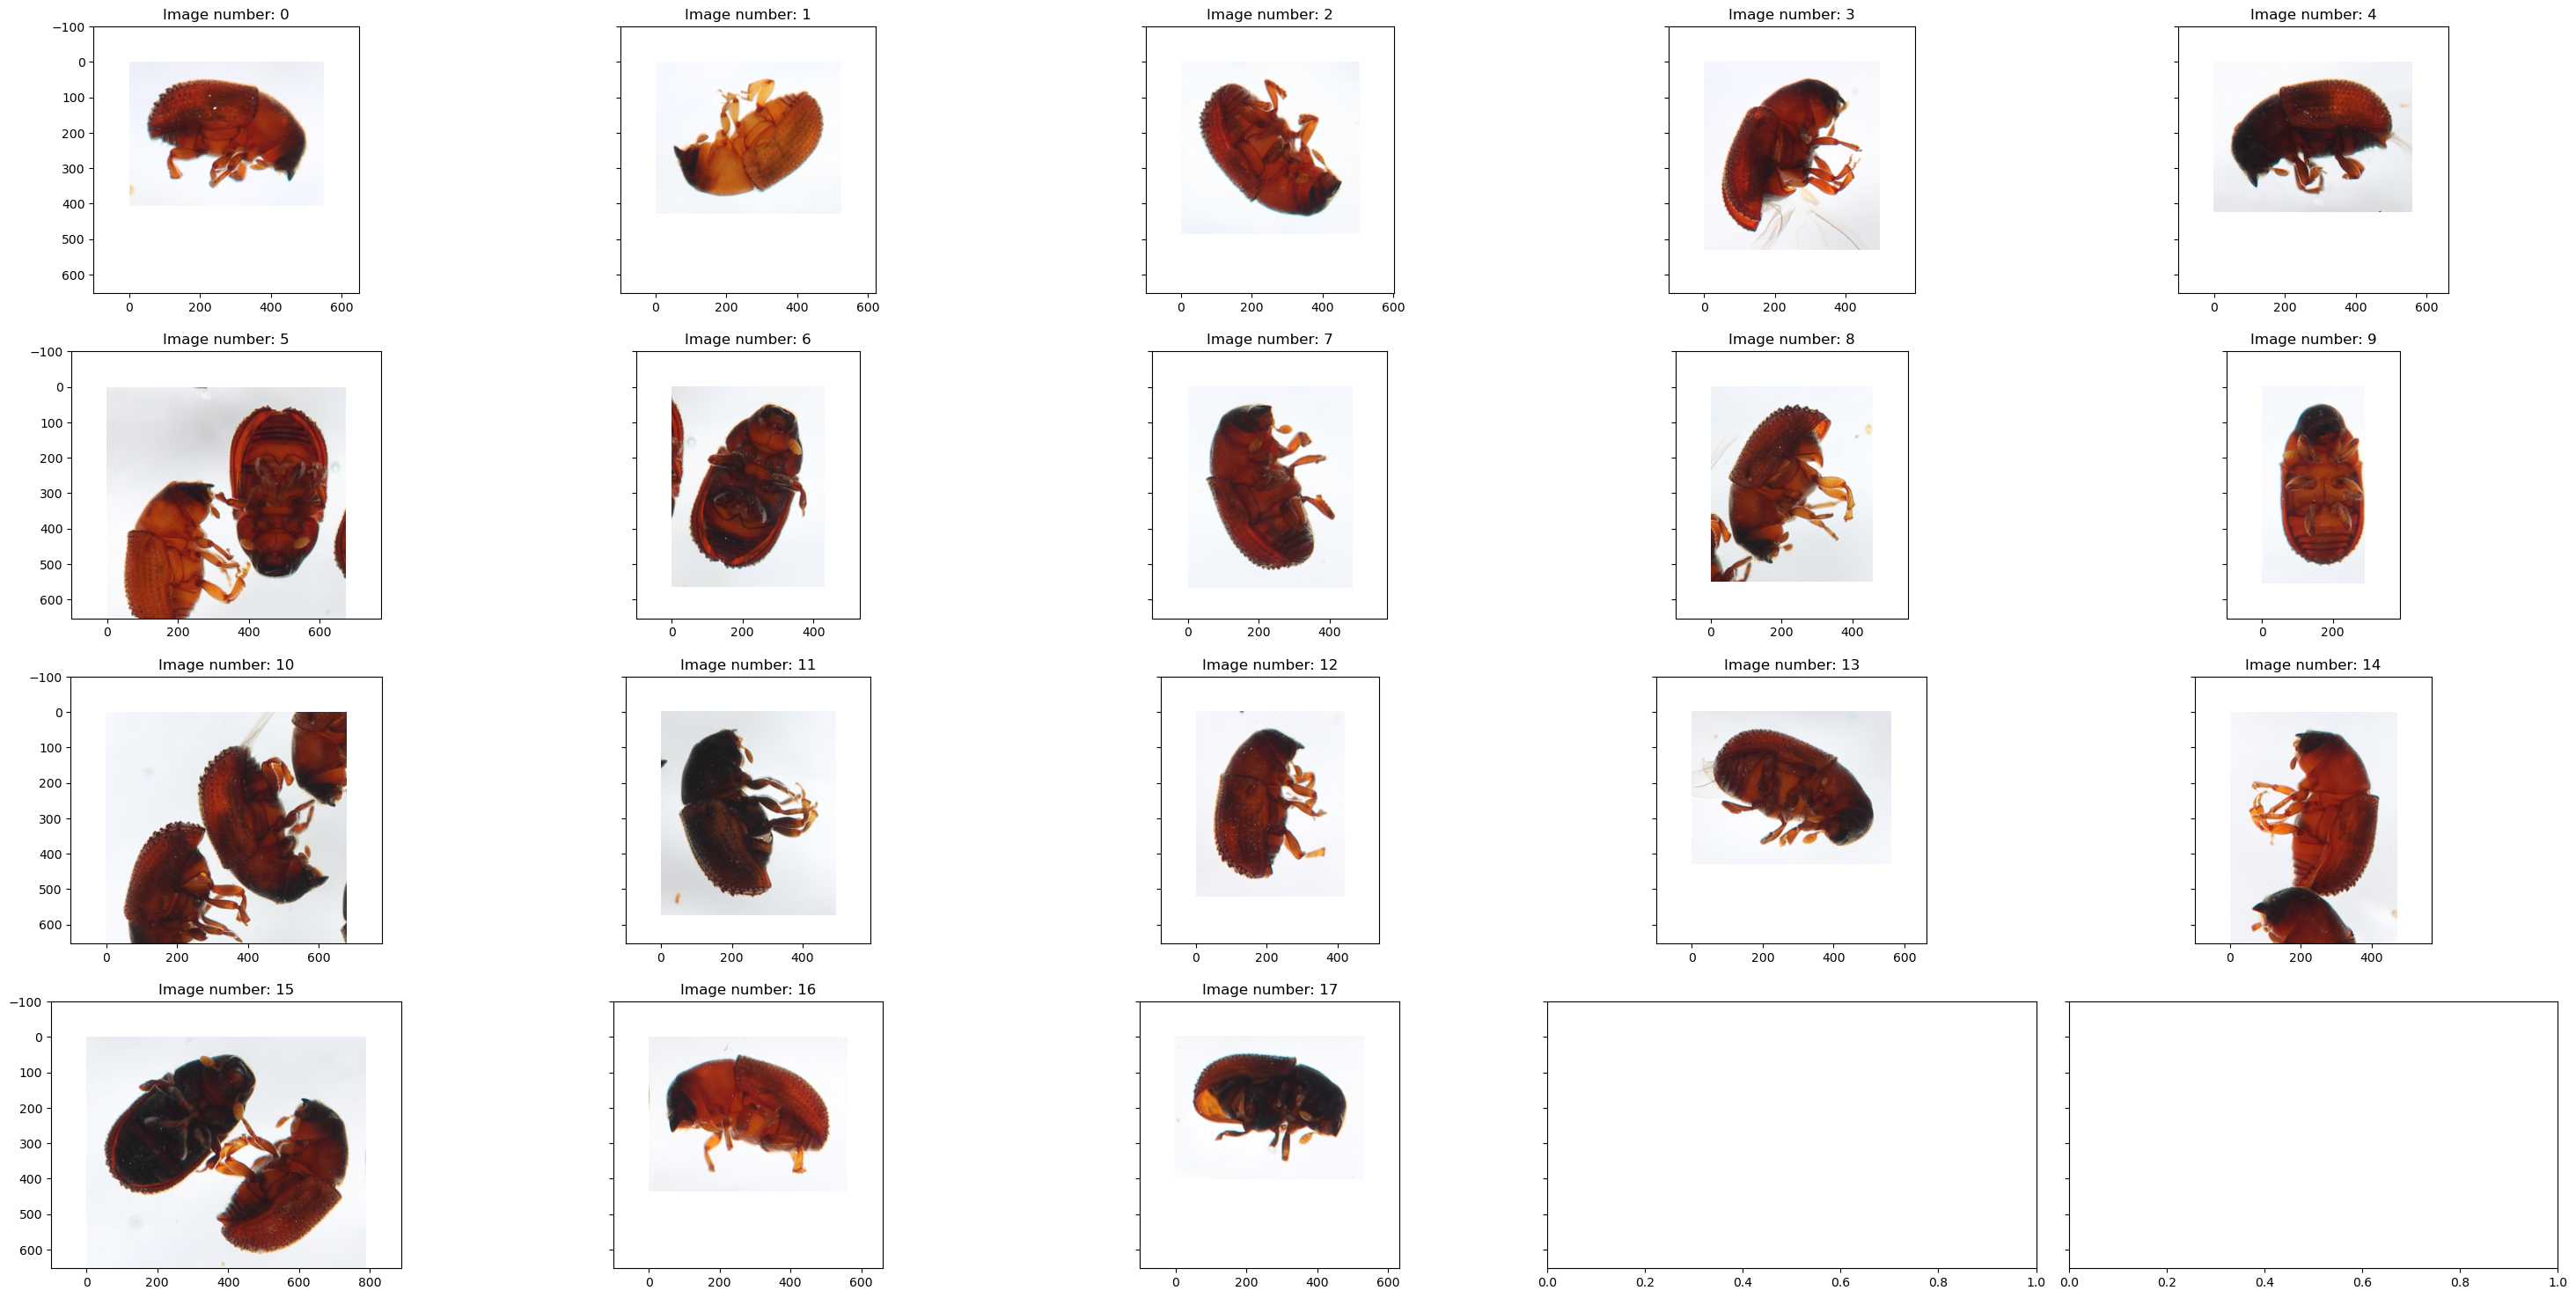

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all images in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.set_figheight(15)
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

In [ ]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

In [ ]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

In [ ]:
# plot boxplot of summmed correlation
plt.figure(figsize=(20, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

In [ ]:
list(ppi.corr_coef_sum)

# Estimate size

In [ ]:
io.imshow(ppi.inv_bw_image_lst[15])

In [ ]:
ppi.estimate_size(outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

In [ ]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

In [ ]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

In [ ]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

In [ ]:
# define list of images
img_lst = ppi.inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
# define list of images
img_lst = ppi.clean_inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [ ]:
ppi.image_selected_df